# Data Collection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,make_scorer,roc_curve,roc_auc_score,plot_roc_curve
from sklearn.ensemble import ExtraTreesClassifier 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Heart Disease.csv')

In [3]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
df.shape

(319795, 18)

In [5]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [6]:
df['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [7]:
df['DiffWalking'].unique()

array(['No', 'Yes'], dtype=object)

In [8]:
df['Diabetic'].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [9]:
df['Race'].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [10]:
df['PhysicalActivity'].unique()

array(['Yes', 'No'], dtype=object)

In [11]:
df['GenHealth'].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [12]:
df['Asthma'].unique()

array(['Yes', 'No'], dtype=object)

In [13]:
df['Asthma'].unique()

array(['Yes', 'No'], dtype=object)

In [14]:
df['KidneyDisease'].unique()

array(['No', 'Yes'], dtype=object)

In [15]:
df['SkinCancer'].unique()

array(['Yes', 'No'], dtype=object)

In [16]:
df.isnull().sum()  

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [17]:
df.isnull().values.sum()

0

In [18]:
df.duplicated().any()

True

In [19]:
df.drop_duplicates(inplace = True)

In [20]:
df.duplicated().any()

False

In [21]:
df.shape #After remove duplicate values

(301717, 18)

In [22]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [23]:
print('Number of Patients in this Heart disease Dataset:', df.shape[0])
print('Number of Attributes of Single Patient:', df.shape[1])

Number of Patients in this Heart disease Dataset: 301717
Number of Attributes of Single Patient: 18


In [24]:
df['HeartDisease'].value_counts(normalize=True)*100

No     90.964712
Yes     9.035288
Name: HeartDisease, dtype: float64

In [25]:
print('From this dataset 9% people have Heart disease and 91% donot have this disease ')

From this dataset 9% people have Heart disease and 91% donot have this disease 


# EDA

In [26]:
df.value_counts('HeartDisease')

HeartDisease
No     274456
Yes     27261
dtype: int64

In [27]:
df['HeartDisease'].unique()

array(['No', 'Yes'], dtype=object)

<AxesSubplot:>

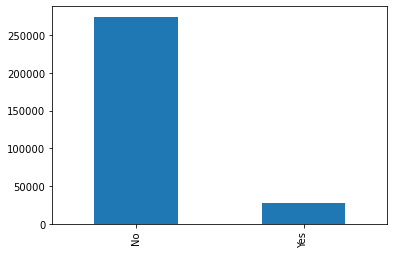

In [28]:
df['HeartDisease'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

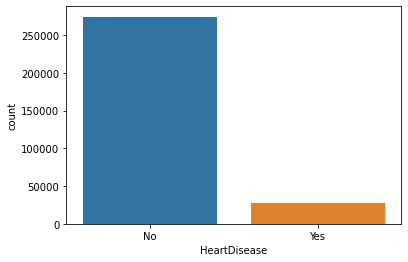

In [29]:
sns.countplot(df['HeartDisease'])

<AxesSubplot:xlabel='Smoking', ylabel='count'>

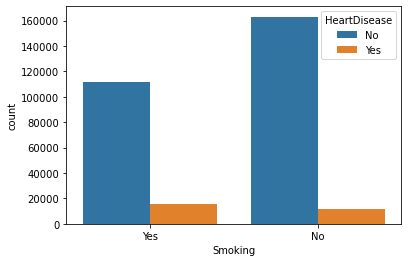

In [30]:
sns.countplot(x='Smoking',hue='HeartDisease',data=df)

<AxesSubplot:xlabel='AgeCategory', ylabel='count'>

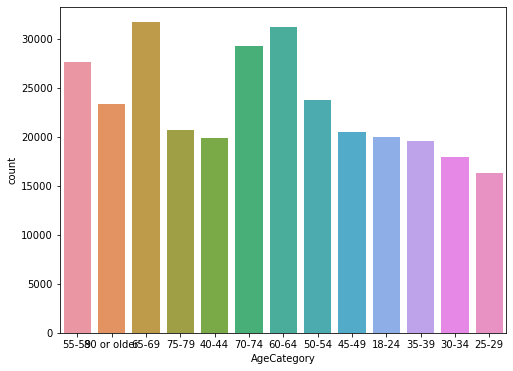

In [31]:
plt.figure(figsize=(8,6))
sns.countplot(x='AgeCategory',data=df)

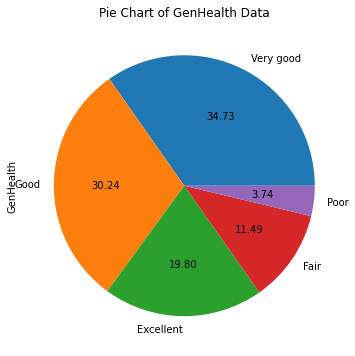

In [32]:
plt.figure(figsize=(6,6))
plt.title("Pie Chart of GenHealth Data")
df.GenHealth.value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

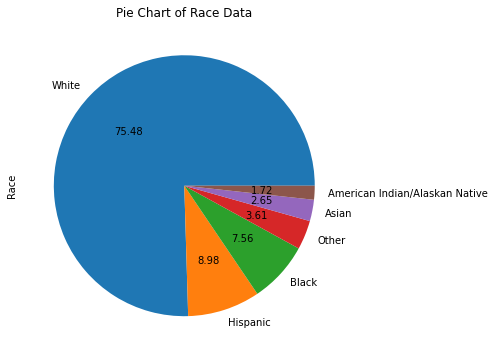

In [33]:
plt.figure(figsize=(6,6))
plt.title("Pie Chart of Race Data")
df.Race.value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

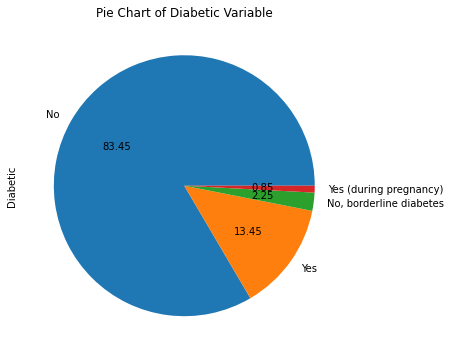

In [34]:
plt.figure(figsize=(6,6))
plt.title("Pie Chart of Diabetic Variable")
df.Diabetic.value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

<AxesSubplot:xlabel='AgeCategory', ylabel='count'>

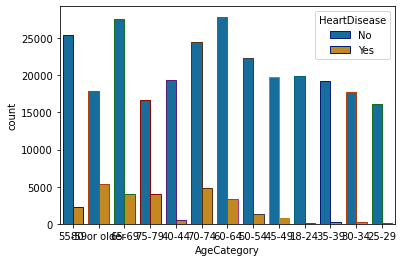

In [35]:
sns.countplot(x='AgeCategory', hue= 'HeartDisease', data = df, palette = 'colorblind', edgecolor = sns.color_palette('dark'))

In [36]:
df.corr()

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.103813,0.056724,-0.048653
PhysicalHealth,0.103813,1.000000,0.279657,-0.058406
MentalHealth,0.056724,0.279657,1.000000,-0.117078
SleepTime,-0.048653,-0.058406,-0.117078,1.000000


In [37]:
df.groupby('Sex').mean()

,BMI,PhysicalHealth,MentalHealth,SleepTime
Sex,,,,
Female,28.294331,3.867346,4.879815,7.105179
Male,28.607928,3.240640,3.269040,7.061382


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301717 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  object 
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  object 
 3   AlcoholDrinking   301717 non-null  object 
 4   Stroke            301717 non-null  object 
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  object 
 8   Sex               301717 non-null  object 
 9   AgeCategory       301717 non-null  object 
 10  Race              301717 non-null  object 
 11  Diabetic          301717 non-null  object 
 12  PhysicalActivity  301717 non-null  object 
 13  GenHealth         301717 non-null  object 
 14  SleepTime         301717 non-null  float64
 15  Asthma            301717 non-null  object 
 16  KidneyDisease     30

In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,301717.0,28.441970,6.468134,12.02,24.03,27.41,31.65,94.85
PhysicalHealth,301717.0,3.572298,8.140656,0.00,0.00,0.00,2.00,30.00
MentalHealth,301717.0,4.121475,8.128288,0.00,0.00,0.00,4.00,30.00
SleepTime,301717.0,7.084559,1.467122,1.00,6.00,7.00,8.00,24.00


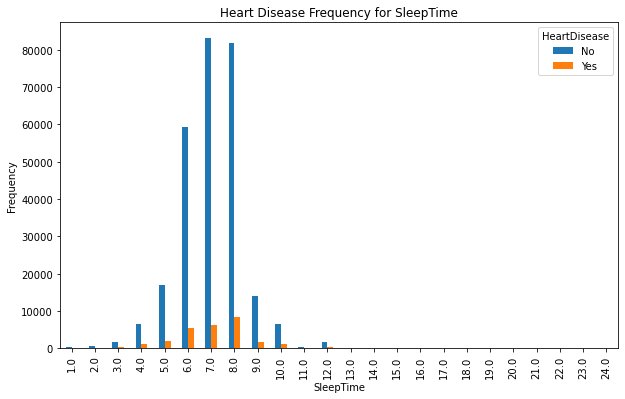

In [40]:
pd.crosstab(df.SleepTime,df.HeartDisease).plot(kind="bar",figsize=(10,6))
plt.title('Heart Disease Frequency for SleepTime')
plt.xlabel('SleepTime')
plt.ylabel('Frequency')
plt.show()

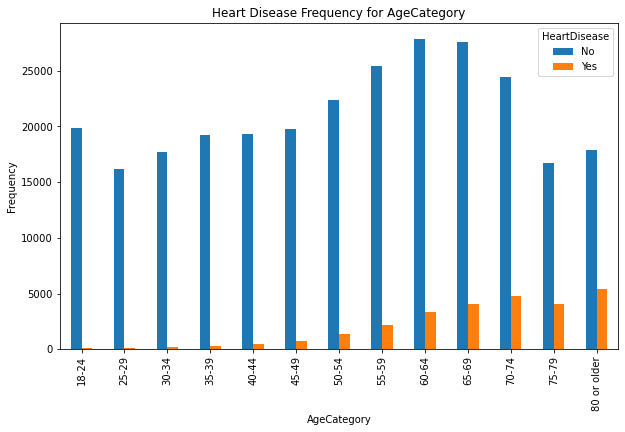

In [41]:
pd.crosstab(df.AgeCategory,df.HeartDisease).plot(kind="bar",figsize=(10,6))
plt.title('Heart Disease Frequency for AgeCategory')
plt.xlabel('AgeCategory')
plt.ylabel('Frequency')
plt.show()

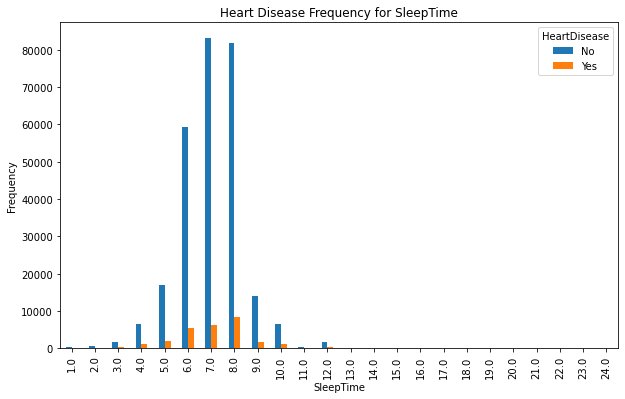

In [42]:
pd.crosstab(df.SleepTime,df.HeartDisease).plot(kind="bar",figsize=(10,6))
plt.title('Heart Disease Frequency for SleepTime')
plt.xlabel('SleepTime')
plt.ylabel('Frequency')
plt.show()

In [43]:
#sns.pairplot(df, hue='HeartDisease', height=2)

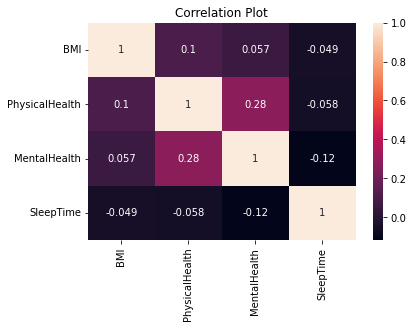

In [44]:
#plt.figure(figsize=(6,6))
corr_set=sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Plot')
plt.show()

In [45]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df[["BMI","PhysicalHealth","MentalHealth","SleepTime"]]=sc.fit_transform(df[["BMI","PhysicalHealth","MentalHealth","SleepTime"]])

In [46]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,-1.830820,Yes,No,No,-0.070301,3.183766,No,Female,55-59,White,Yes,Yes,Very good,-1.420852,Yes,No,Yes
1,No,-1.252600,No,No,Yes,-0.438823,-0.507054,No,Female,80 or older,White,No,Yes,Very good,-0.057636,No,No,No
2,No,-0.287869,Yes,No,No,2.017986,3.183766,No,Male,65-69,White,Yes,Yes,Fair,0.623971,Yes,No,No
3,No,-0.654281,No,No,No,-0.438823,-0.507054,No,Female,75-79,White,No,No,Good,-0.739244,No,No,Yes
4,No,-0.731583,No,No,No,3.000709,-0.507054,Yes,Female,40-44,White,No,Yes,Very good,0.623971,No,No,No


In [47]:
df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

# Remove Outlier

<AxesSubplot:>

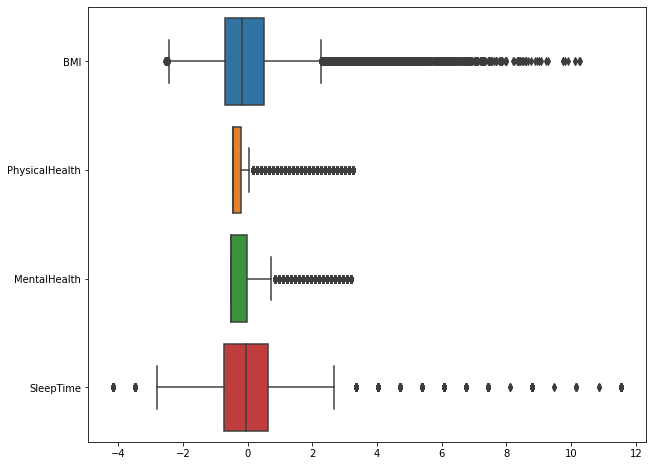

In [48]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df, orient='h')

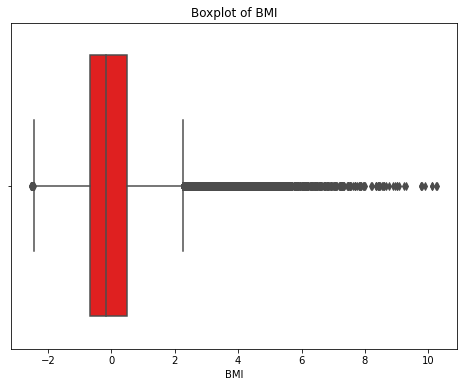

In [49]:
plt.figure(figsize=(8,6))
sns.boxplot(df.BMI, color="red")
plt.title("Boxplot of BMI")
plt.show()

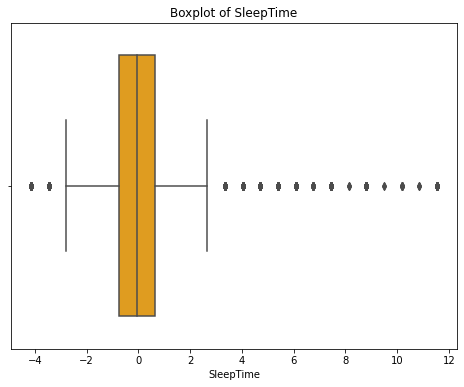

In [50]:
plt.figure(figsize=(8,6))
sns.boxplot(df.SleepTime, color="orange")
plt.title("Boxplot of SleepTime")
plt.show()

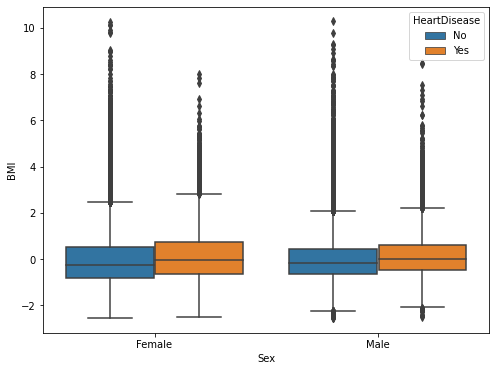

In [51]:
plt.figure(figsize=(8,6))
sns.boxplot(df.Sex, df.BMI, hue=df.HeartDisease)
plt.show()

In [52]:
numeric_col_list=[]  # List of Numeric Column
for col in df.columns:
    if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
        numeric_col_list.append(col)
        print(col)

BMI
PhysicalHealth
MentalHealth
SleepTime


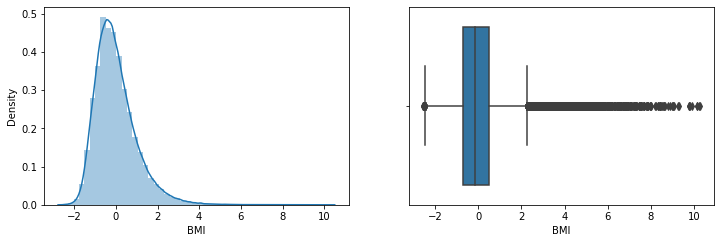

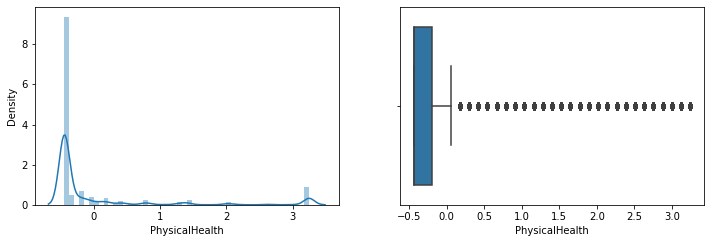

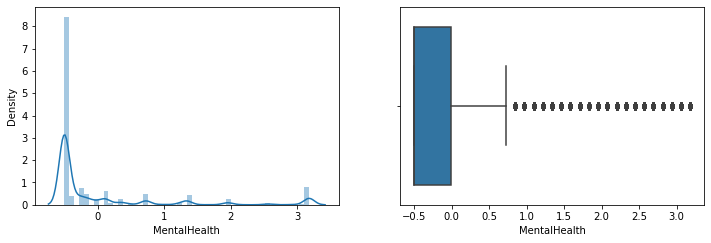

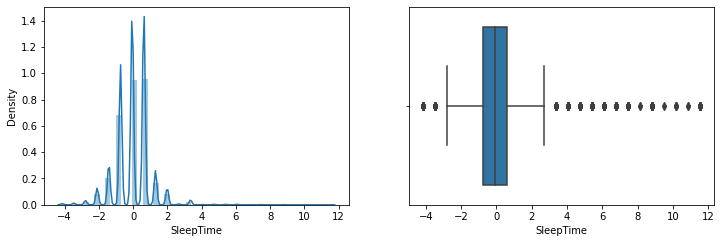

In [53]:
#Numeric columns with outlier
for col in numeric_col_list:
    plt.figure(figsize=(12,8))
    plt.subplot(2,2,1)
    sns.distplot(df[col])
    plt.subplot(2,2,2)
    sns.boxplot(df[col])
    plt.show()

In [54]:
df.shape

(301717, 18)

Compare the plots after Trimming


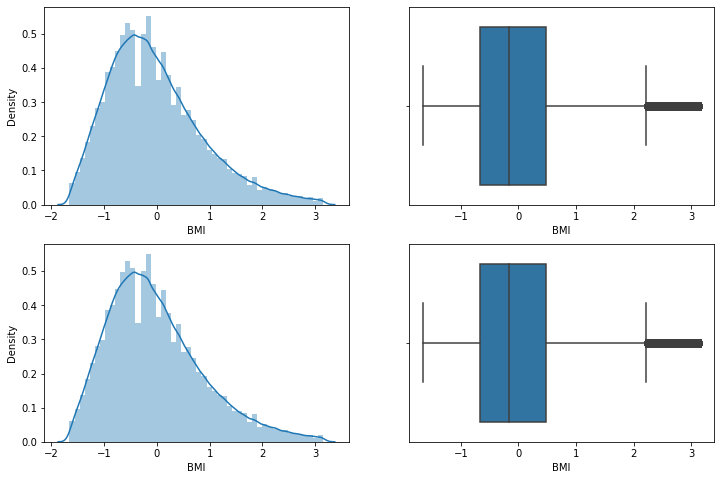

Compare the plots after Trimming


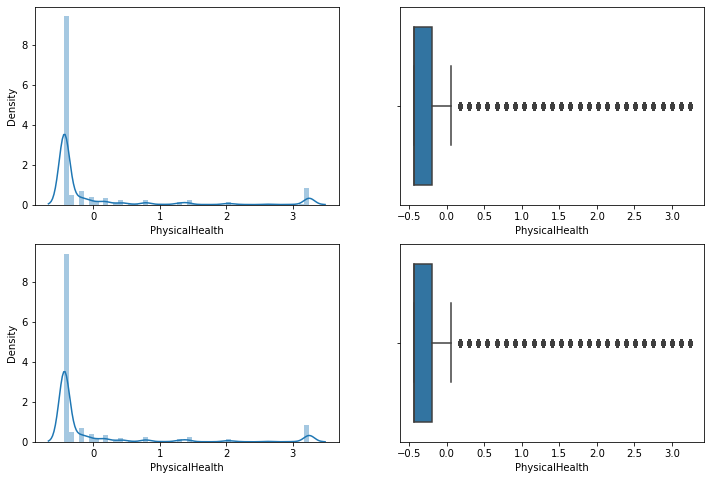

Compare the plots after Trimming


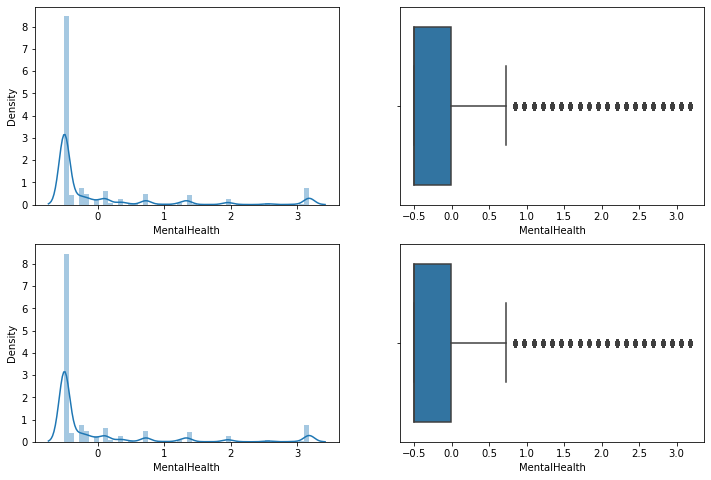

Compare the plots after Trimming


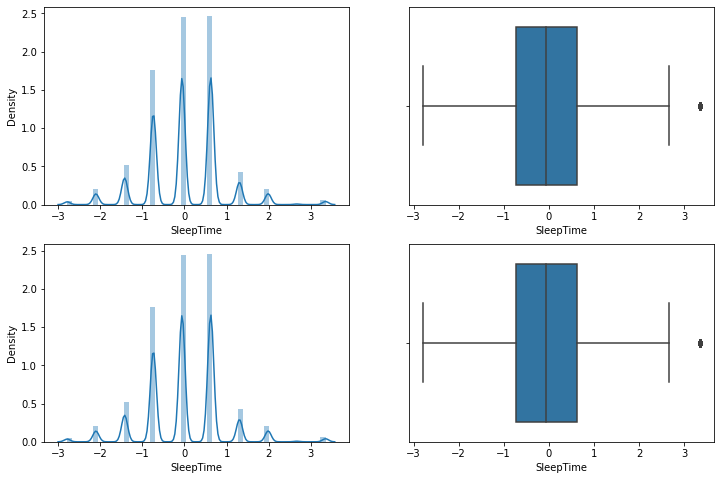

In [55]:
import numpy as np    #After removing outlier
for col in numeric_col_list:
    upper_limit = df[col].quantile(0.99)
    lower_limit = df[col].quantile(0.01)
    df = df[(df[col] <= upper_limit) & (df[col] >= lower_limit)]
    plt.figure(figsize=(12,8))
    plt.subplot(2,2,1)
    sns.distplot(df[col])
    plt.subplot(2,2,2)
    sns.boxplot(df[col])
    print('Compare the plots after Trimming')
    plt.subplot(2,2,3)
    sns.distplot(df[col])
    plt.subplot(2,2,4)
    sns.boxplot(df[col])
    plt.show()

In [56]:
df.shape

(293510, 18)

# Encoding

In [57]:
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df[["AgeCategory","Race","Diabetic","GenHealth"]]=oe.fit_transform(df[["AgeCategory","Race","Diabetic","GenHealth"]])

In [58]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
1,No,-1.252600,No,No,Yes,-0.438823,-0.507054,No,Female,12.0,5.0,0.0,Yes,4.0,-0.057636,No,No,No
2,No,-0.287869,Yes,No,No,2.017986,3.183766,No,Male,9.0,5.0,2.0,Yes,1.0,0.623971,Yes,No,No
3,No,-0.654281,No,No,No,-0.438823,-0.507054,No,Female,11.0,5.0,0.0,No,2.0,-0.739244,No,No,Yes
4,No,-0.731583,No,No,No,3.000709,-0.507054,Yes,Female,4.0,5.0,0.0,Yes,4.0,0.623971,No,No,No
5,Yes,0.066175,Yes,No,No,0.298220,-0.507054,Yes,Female,11.0,2.0,0.0,No,1.0,3.350402,No,No,No


In [59]:
#sns.pairplot(hue= 'HeartDisease', data = df, palette = 'colorblind')

In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [61]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [62]:
for col in df.columns:
    if is_numeric_dtype(df[col]):
        continue
    df[col]=le.fit_transform(df[col]) 

In [63]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
1,0,-1.252600,0,0,1,-0.438823,-0.507054,0,0,12.0,5.0,0.0,1,4.0,-0.057636,0,0,0
2,0,-0.287869,1,0,0,2.017986,3.183766,0,1,9.0,5.0,2.0,1,1.0,0.623971,1,0,0
3,0,-0.654281,0,0,0,-0.438823,-0.507054,0,0,11.0,5.0,0.0,0,2.0,-0.739244,0,0,1
4,0,-0.731583,0,0,0,3.000709,-0.507054,1,0,4.0,5.0,0.0,1,4.0,0.623971,0,0,0
5,1,0.066175,1,0,0,0.298220,-0.507054,1,0,11.0,2.0,0.0,0,1.0,3.350402,0,0,0


In [64]:
x = df.drop('HeartDisease',axis=1)
y = df['HeartDisease']

In [65]:
x.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
1,-1.252600,0,0,1,-0.438823,-0.507054,0,0,12.0,5.0,0.0,1,4.0,-0.057636,0,0,0
2,-0.287869,1,0,0,2.017986,3.183766,0,1,9.0,5.0,2.0,1,1.0,0.623971,1,0,0
3,-0.654281,0,0,0,-0.438823,-0.507054,0,0,11.0,5.0,0.0,0,2.0,-0.739244,0,0,1
4,-0.731583,0,0,0,3.000709,-0.507054,1,0,4.0,5.0,0.0,1,4.0,0.623971,0,0,0
5,0.066175,1,0,0,0.298220,-0.507054,1,0,11.0,2.0,0.0,0,1.0,3.350402,0,0,0


In [66]:
y.head()

1    0
2    0
3    0
4    0
5    1
Name: HeartDisease, dtype: int32

# Sampling 

In [67]:
from imblearn.combine import SMOTETomek
sm = SMOTETomek(random_state=42)
smx,smy = sm.fit_resample(x,y)

In [68]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(smx,smy, test_size=.20, random_state=42)

In [69]:
x_train.shape, y_train.shape

((416558, 17), (416558,))

In [70]:
y_train.value_counts()#After sampling

0    208408
1    208150
Name: HeartDisease, dtype: int64

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

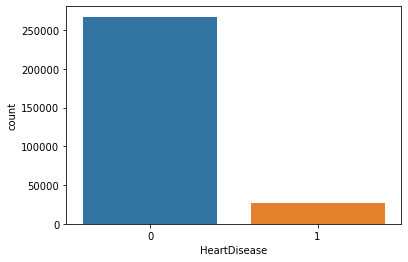

In [71]:
sns.countplot(df['HeartDisease'])

# Feature Selection

In [72]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
fit_feature=SelectKBest(score_func=f_classif)
fit_feature.fit(x_train,y_train) 

SelectKBest()

In [73]:
name_col=pd.DataFrame(x.columns, columns=['Feature Name'])
score_col=pd.DataFrame(fit_feature.scores_,columns=['Score Value'])
top_feature=pd.concat([name_col,score_col],axis=1)
top_feature.nlargest(17,'Score Value')

,Feature Name,Score Value
8,AgeCategory,109454.831562
10,Diabetic,26579.059120
4,PhysicalHealth,23004.351241
6,DiffWalking,22186.564824
11,PhysicalActivity,16907.037549
2,AlcoholDrinking,9539.471941
1,Smoking,8155.472036
3,Stroke,7296.496719
7,Sex,3551.255500
9,Race,3268.357478


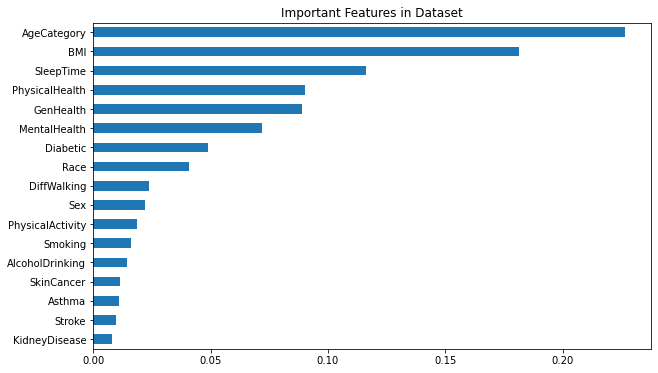

In [74]:
model = ExtraTreesClassifier()
model.fit(x_train,y_train)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
plt.figure(figsize=(10,6))
feat_importances.nsmallest(30).plot(kind='barh')
round(feat_importances,4)*100
plt.title('Important Features in Dataset',size=12)
plt.show()

# LogisticRegression

In [75]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [76]:
lr_pred = lr.predict(x_test)

In [77]:
lr_pred

array([0, 1, 1, ..., 1, 1, 1])

In [78]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.77      0.70      0.73     51941
           1       0.73      0.79      0.76     52199

    accuracy                           0.75    104140
   macro avg       0.75      0.75      0.75    104140
weighted avg       0.75      0.75      0.75    104140



In [79]:
cm1 = confusion_matrix(y_test,lr_pred)

Text(42.0, 0.5, 'Actual')

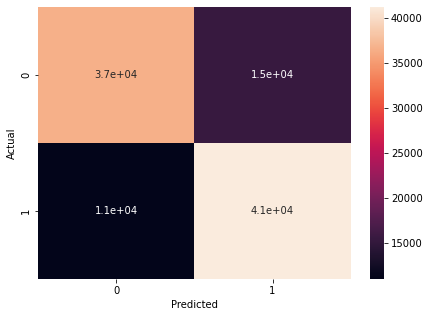

In [80]:
plt.figure(figsize=(7,5))
sns.heatmap(cm1,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [81]:
print('Accuracy score for testing data:', accuracy_score(y_test,lr_pred))
print('f1 score:',f1_score(y_test,lr_pred))
lr1_pred = lr.predict(x_train)
print('Accuracy score for training data:',accuracy_score(y_train,lr1_pred))

Accuracy score for testing data: 0.7468215863260995
f1 score: 0.7577366950896794
Accuracy score for training data: 0.7445253722170743


In [82]:
pd.DataFrame(np.c_[y_test,lr_pred],columns=['Actual','Predicted'])

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
104135,0,0
104136,0,0
104137,1,1
104138,1,1


# KNN

In [83]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [84]:
knn_pred = knn.predict(x_test)

In [85]:
knn_pred

array([0, 1, 1, ..., 1, 1, 1])

In [86]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85     51941
           1       0.81      0.95      0.87     52199

    accuracy                           0.86    104140
   macro avg       0.87      0.86      0.86    104140
weighted avg       0.87      0.86      0.86    104140



In [87]:
cm2=confusion_matrix(y_test,knn_pred)

Text(42.0, 0.5, 'Actual')

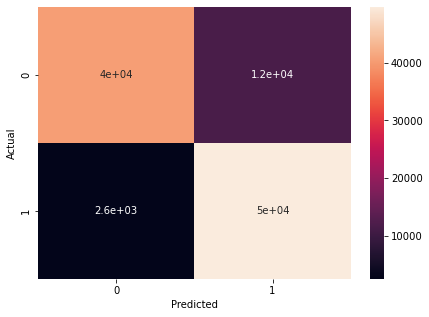

In [88]:
plt.figure(figsize=(7,5))
sns.heatmap(cm2,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [89]:
print('Accuracy score for testing data:',accuracy_score(y_test,knn_pred))
knn1_pred = knn.predict(x_train)
print('Accuracy score for training data:',accuracy_score(y_train,knn1_pred))
print('f1 score:',f1_score(y_test,knn_pred))


Accuracy score for testing data: 0.8632609948146726
Accuracy score for training data: 0.9008637452647651
f1 score: 0.8744688728644723


In [90]:
pd.DataFrame(np.c_[y_test,knn_pred],columns=['Actual','Predicted'])

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
104135,0,0
104136,0,0
104137,1,1
104138,1,1


# DecisionTree

In [91]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()#criterion='entropy',random_state=1
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [92]:
dtc_pred = dtc.predict(x_test)

In [93]:
dtc_pred

array([0, 1, 1, ..., 1, 1, 1])

In [94]:
print(classification_report(y_test,dtc_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89     51941
           1       0.89      0.90      0.89     52199

    accuracy                           0.89    104140
   macro avg       0.89      0.89      0.89    104140
weighted avg       0.89      0.89      0.89    104140



In [95]:
cm3=confusion_matrix(y_test,dtc_pred)

Text(42.0, 0.5, 'Actual')

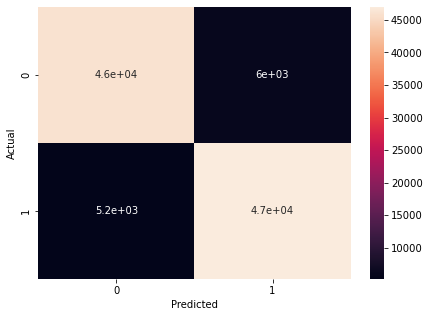

In [96]:
plt.figure(figsize=(7,5))
sns.heatmap(cm3,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [97]:
print('Accuracy score for testing data:',accuracy_score(y_test,dtc_pred))
dtc1_pred = dtc.predict(x_train)
print('Accuracy score for training data:',accuracy_score(y_train,dtc1_pred))

print('f1 score:',f1_score(y_test,dtc_pred))


Accuracy score for testing data: 0.8921451891684271
Accuracy score for training data: 0.9982523442113703
f1 score: 0.8932420872540633


In [98]:
pd.DataFrame(np.c_[y_test,dtc_pred],columns=['Actual','Predicted'])

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
104135,0,0
104136,0,0
104137,1,1
104138,1,1


# RandomForest

In [99]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [100]:
rfc_pred = rfc.predict(x_test)

In [101]:
rfc_pred 

array([0, 1, 1, ..., 1, 1, 1])

In [102]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     51941
           1       0.93      0.94      0.93     52199

    accuracy                           0.93    104140
   macro avg       0.93      0.93      0.93    104140
weighted avg       0.93      0.93      0.93    104140



In [103]:
cm4=confusion_matrix(y_test,rfc_pred)

Text(42.0, 0.5, 'Actual')

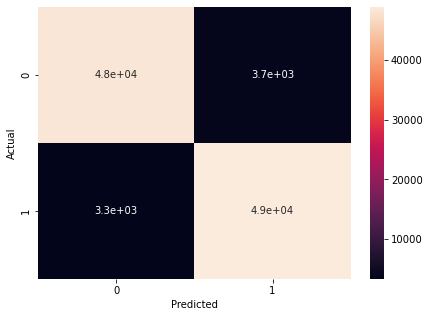

In [104]:
plt.figure(figsize=(7,5))
sns.heatmap(cm4,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [105]:
print('Testing Accuracy score:',accuracy_score(y_test,rfc_pred))
rfc1_pred = rfc.predict(x_train)
print('Training Accuracy_score:',accuracy_score(y_train,rfc1_pred))
print('f1 score:',f1_score(y_test,rfc_pred))

Testing Accuracy score: 0.9319185711542155
Training Accuracy_score: 0.9982379404548706
f1 score: 0.932344745982671


In [106]:
pd.DataFrame(np.c_[y_test,rfc_pred],columns=['Actual','Predicted'])

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
104135,0,0
104136,0,0
104137,1,1
104138,1,1


# GradientBoosting

In [107]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [108]:
gb_pred = gb.predict(x_test)

In [109]:
gb_pred 

array([0, 1, 1, ..., 1, 1, 1])

In [110]:
cm5=confusion_matrix(y_test,gb_pred)

Text(42.0, 0.5, 'Actual')

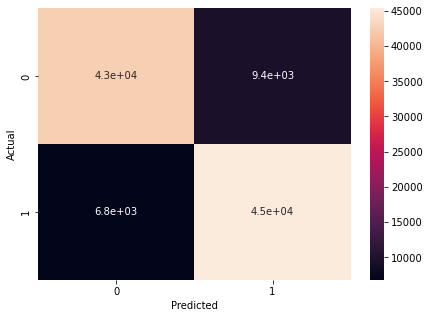

In [111]:
plt.figure(figsize=(7,5))
sns.heatmap(cm5,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [112]:
print(classification_report(y_test,gb_pred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84     51941
           1       0.83      0.87      0.85     52199

    accuracy                           0.84    104140
   macro avg       0.85      0.84      0.84    104140
weighted avg       0.85      0.84      0.84    104140



In [113]:
print('Accuracy score testing data:',accuracy_score(y_test,gb_pred))
gb1_pred = gb.predict(x_train)
print('Accuracy score training data:',accuracy_score(y_train,gb1_pred))
print('f1 score:',f1_score(y_test,gb_pred))

Accuracy score testing data: 0.8443921643940849
Accuracy score training data: 0.8420772137373427
f1 score: 0.8485584785757675


In [114]:
pd.DataFrame(np.c_[y_test,gb_pred],columns=['Actual','Predicted'])

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
104135,0,0
104136,0,0
104137,1,1
104138,1,1


# AdaBoost

In [115]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()
ab.fit(x_train,y_train)

AdaBoostClassifier()

In [116]:
ab_pred = ab.predict(x_test)

In [117]:
ab_pred

array([0, 1, 1, ..., 1, 1, 1])

In [118]:
print(classification_report(y_test,ab_pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80     51941
           1       0.79      0.83      0.81     52199

    accuracy                           0.80    104140
   macro avg       0.80      0.80      0.80    104140
weighted avg       0.80      0.80      0.80    104140



In [119]:
cm6=confusion_matrix(y_test,ab_pred)

Text(42.0, 0.5, 'Actual')

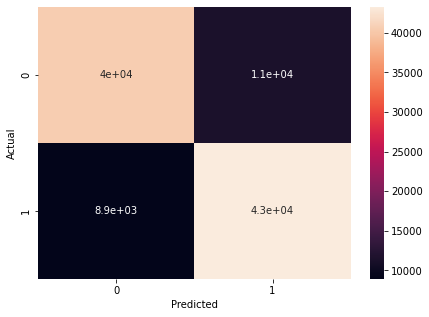

In [120]:
plt.figure(figsize=(7,5))
sns.heatmap(cm6,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [121]:
print('Accuracy score testing data:',accuracy_score(y_test,ab_pred))
ab1_pred = ab.predict(x_train)
print('Accuracy score in training data:',accuracy_score(y_train,ab1_pred))
print('f1 score:',f1_score(y_test,ab_pred))

Accuracy score testing data: 0.8038697906664106
Accuracy score in training data: 0.8004503574532238
f1 score: 0.8089854015281168


In [122]:
pd.DataFrame(np.c_[y_test,ab_pred],columns=['Actual','Predicted'])

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
104135,0,0
104136,0,1
104137,1,1
104138,1,1


# xgboost

In [123]:
import xgboost
from xgboost import XGBClassifier
xb = XGBClassifier()
xb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [124]:
xb_pred = xb.predict(x_test)

In [125]:
xb_pred 

array([0, 1, 1, ..., 1, 1, 1])

In [126]:
print(classification_report(y_test,xb_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     51941
           1       0.92      0.89      0.91     52199

    accuracy                           0.91    104140
   macro avg       0.91      0.91      0.91    104140
weighted avg       0.91      0.91      0.91    104140



In [127]:
cm7= confusion_matrix(y_test,xb_pred)

Text(42.0, 0.5, 'Actual')

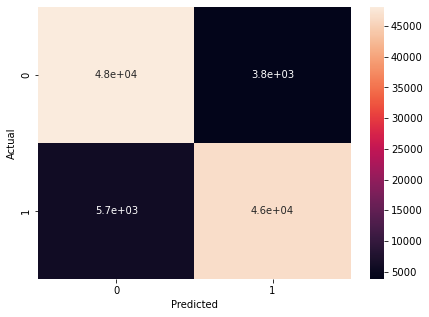

In [128]:
plt.figure(figsize=(7,5))
sns.heatmap(cm7,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [129]:
print('Accuracy score testing data:',accuracy_score(y_test,xb_pred))
xb1_pred = xb.predict(x_train)
print('Accuracy score training data:',accuracy_score(y_train,xb1_pred))
print('f1 score:',f1_score(y_test,xb_pred))

Accuracy score testing data: 0.9082004993278279
Accuracy score training data: 0.9112632574575449
f1 score: 0.9067153256181574


In [130]:
pd.DataFrame(np.c_[y_test,xb_pred],columns=['Actual','Predicted'])

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
104135,0,0
104136,0,0
104137,1,1
104138,1,1


# ANN

In [131]:
import tensorflow as tf
from tensorflow import keras

In [132]:
len(x_train.columns)

model = keras.Sequential([
    keras.layers.Dense(15, input_shape=(17,), activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation ='sigmoid'),
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])


model.fit(x_train,y_train, epochs=5)


Epoch 1/5
13018/13018 [==============================] - 13s 922us/step - loss: 0.5121 - accuracy: 0.7519
Epoch 2/5
13018/13018 [==============================] - 12s 915us/step - loss: 0.4977 - accuracy: 0.7610
Epoch 3/5
13018/13018 [==============================] - 12s 930us/step - loss: 0.4943 - accuracy: 0.7637
Epoch 4/5
13018/13018 [==============================] - 13s 1ms/step - loss: 0.4927 - accuracy: 0.7647
Epoch 5/5
13018/13018 [==============================] - 13s 1ms/step - loss: 0.4918 - accuracy: 0.7654


In [133]:
model.evaluate(x_test,y_test)

3255/3255 [==============================] - 4s 1ms/step - loss: 0.4879 - accuracy: 0.7675


[0.48790279030799866, 0.767476499080658]

In [134]:
yp = model.predict(x_test)

3255/3255 [==============================] - 2s 710us/step


In [135]:
y_test[:5]

108896    0
400948    1
460678    1
432835    1
407352    1
Name: HeartDisease, dtype: int32

In [136]:
ann_pred = []

for element in yp:
    if element > 0.5:
        ann_pred.append(1)
    else:
        ann_pred.append(0)

In [137]:
ann_pred[:5]

[0, 1, 1, 1, 1]

In [138]:
print(classification_report(y_test,ann_pred))

              precision    recall  f1-score   support

           0       0.80      0.72      0.75     51941
           1       0.74      0.82      0.78     52199

    accuracy                           0.77    104140
   macro avg       0.77      0.77      0.77    104140
weighted avg       0.77      0.77      0.77    104140



In [139]:
print('Accuracy score testing data:',accuracy_score(y_test,ann_pred))
#ann1_pred = model.predict(x_train)
#print('Accuracy score training data:',accuracy_score(y_train,ann1_pred))
print(f1_score(y_test,ann_pred))

Accuracy score testing data: 0.7674764739773382
0.7794405632622576


In [140]:
cm8=confusion_matrix(y_test,ann_pred)

Text(42.0, 0.5, 'Actual')

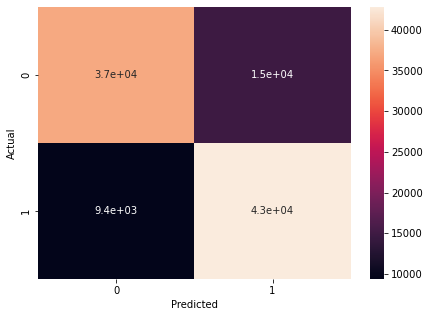

In [141]:
plt.figure(figsize=(7,5))
sns.heatmap(cm8,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

# K-fold cross validation

In [142]:
from sklearn.model_selection import cross_val_score

In [143]:
cv_score=cross_val_score(knn,x_train,y_train, cv=5) #KNN
cv_score 
cv_score.mean()

0.8516989313842851

In [144]:
cv_score=cross_val_score(rfc,x_train,y_train, cv=5) #RF
cv_score 
cv_score.mean()

0.923415229391329

In [145]:
cv_score=cross_val_score(lr,x_train,y_train, cv=5) #LR
cv_score
cv_score.mean()

0.7445757920871977

In [146]:
cv_score=cross_val_score(dtc,x_train,y_train, cv=5) #DT
cv_score 
cv_score.mean()

0.8832911648207258

In [147]:
cv_score=cross_val_score(ab,x_train,y_train, cv=5) #AB
cv_score 
cv_score.mean()

0.800942489124439

In [148]:
cv_score=cross_val_score(gb,x_train,y_train, cv=5) #GB
cv_score 
cv_score.mean()

0.8412249974543015

In [149]:
cv_score=cross_val_score(xb,x_train,y_train, cv=5) #XB
cv_score 
cv_score.mean()

0.9069421301471114

# Model Comparison

In [150]:
final_data = pd.DataFrame({'ML Models':['LR','KNN','DT','RF','GB','AB','XB'],
                   'Testing Score':[round(accuracy_score(y_test,lr_pred)*100,2),
                                   round(accuracy_score(y_test,knn_pred)*100,2),
                                    round(accuracy_score(y_test,dtc_pred)*100,2),
                                    round(accuracy_score(y_test,rfc_pred)*100,2),
                                    round(accuracy_score(y_test,gb_pred)*100,2),
                                    round(accuracy_score(y_test,ab_pred)*100,2),
                                    round(accuracy_score(y_test,xb_pred)*100,2)],
                    'Training Score':[round(accuracy_score(y_train,lr1_pred)*100,2),
                                     round(accuracy_score(y_train,knn1_pred)*100,2),
                                     round(accuracy_score(y_train,dtc1_pred)*100,2),
                                     round(accuracy_score(y_train,rfc1_pred)*100,2),
                                     round(accuracy_score(y_train,gb1_pred)*100,2),
                                     round(accuracy_score(y_train,ab1_pred)*100,2),
                                     round(accuracy_score(y_train,xb1_pred)*100,2)],
                          'F1 Score':[round(f1_score(y_test,lr_pred)*100,2),
                                     round(f1_score(y_test,knn_pred)*100,2),
                                     round(f1_score(y_test,dtc_pred)*100,2),
                                     round(f1_score(y_test,rfc_pred)*100,2),
                                     round(f1_score(y_test,gb_pred)*100,2),
                                     round(f1_score(y_test,ab_pred)*100,2),
                                     round(f1_score(y_test,xb_pred)*100,2)]})

In [151]:
final_data

,ML Models,Testing Score,Training Score,F1 Score
0,LR,74.68,74.45,75.77
1,KNN,86.33,90.09,87.45
2,DT,89.21,99.83,89.32
3,RF,93.19,99.82,93.23
4,GB,84.44,84.21,84.86
5,AB,80.39,80.05,80.90
6,XB,90.82,91.13,90.67


<AxesSubplot:xlabel='ML Models', ylabel='Testing Score'>

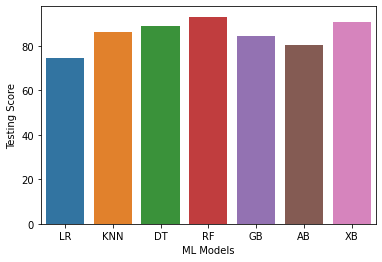

In [152]:
sns.barplot(final_data['ML Models'], final_data['Testing Score'])

# Random Forest with Tuning

In [153]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 110, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]#[int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5,]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
#Method of selecting samples requried of each leaf node
bootstrap = [True,False]


# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'bootstrap':bootstrap}    #'criterion':['entropy','gini']
print(param_grid)

{'n_estimators': [10, 21, 32, 43, 54, 65, 76, 87, 98, 110], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [ ]:
rfc=RandomForestClassifier()

In [ ]:
rf_grid = GridSearchCV(estimator=rfc,param_grid=param_grid,cv=3,verbose=3,n_jobs=4)

In [157]:
rf_grid.fit(x_train,y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 21, 32, 43, 54, 65, 76, 87, 98,
                                          110]},
             verbose=3)

In [ ]:
rf_grid.best_params_

In [164]:
rf_grid.score(x_train,y_train)
rf_grid.score(x_test,y_test)

0.7621567121183023

In [165]:
rf_random = RandomizedSearchCV(estimator=rfc,param_distributions=param_grid,cv=3,verbose=3,n_jobs=4)

In [166]:
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 21, 32, 43, 54, 65,
                                                         76, 87, 98, 110]},
                   verbose=3)

In [167]:
rf_random.best_params_

{'n_estimators': 110,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 4,
 'bootstrap': True}

In [168]:
rf_random.score(x_train,y_train)
rf_random.score(x_test,y_test)

0.7654119454580373